<a href="https://colab.research.google.com/github/Kalima83/procesamiento_lenguaje_natural_Desafios/blob/main/desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy scikit-learn

### Vectorización de texto y modelo de clasificación Naïve Bayes con el dataset 20 newsgroups

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

# 20newsgroups por ser un dataset clásico de NLP ya viene incluido y formateado
# en sklearn
from sklearn.datasets import fetch_20newsgroups
import numpy as np

## Carga de datos

In [3]:
# cargamos los datos (ya separados de forma predeterminada en train y test)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

## Vectorización

In [5]:
# instanciamos un vectorizador
# ver diferentes parámetros de instanciación en la documentación de sklearn https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidfvect = TfidfVectorizer()

### Consigna del desafío 1

**Cada experimento realizado debe estar acompañado de una explicación o interpretación de lo observado.**

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Construir un modelo de clasificación por prototipos (tipo zero-shot). Clasificar los documentos de un conjunto de test comparando cada uno con todos los de entrenamiento y asignar la clase al label del documento del conjunto de entrenamiento con mayor similaridad. (f1-macro // similaridad de coseno)

**3**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**NO cambiar el hiperparámetro ngram_range de los vectorizadores**.

**4**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.

**Elegir las palabras MANUALMENTE para evitar la aparición de términos poco interpretables**.


### 1. Vectorizar los datos de entrenamiento

In [6]:
# Usamos fit_transform para aprender el vocabulario y el IDF, y luego transformar los datos
X_train = tfidfvect.fit_transform(newsgroups_train.data)

# Vectorizar los datos de test
# Usa el transform para aplicar el vocabulario y el IDF aprendidos en el conjunto de entrenamiento
X_test = tfidfvect.transform(newsgroups_test.data)

print("Documentos de entrenamiento vectorizados. Forma de la matriz X_train:")
print(X_train.shape)
print("\nDocumentos de test vectorizados. Forma de la matriz X_test:")
print(X_test.shape)

Documentos de entrenamiento vectorizados. Forma de la matriz X_train:
(11314, 101631)

Documentos de test vectorizados. Forma de la matriz X_test:
(7532, 101631)


####Tomar 5 documentos al azar y medir similaridad con el resto de los documentos. Mostrar los 5 documentos más similares de cada uno.

5 documentos seleccionados al azar:
[9685, 2703, 493, 2053, 6285]

================================5 documentos mas similares====================================================

--- Documentos más similares al Documento 9685 ---
Categoría del Documento Original: talk.politics.mideast


,Documento Similar (Índice),Similaridad Coseno,Categoría del Documento Similar
0,3687,0.492743,talk.politics.mideast
1,5332,0.351622,talk.politics.mideast
2,2847,0.326602,talk.politics.mideast
3,10637,0.308731,talk.politics.mideast
4,8754,0.285285,talk.religion.misc



--- Documentos más similares al Documento 2703 ---
Categoría del Documento Original: comp.sys.ibm.pc.hardware


,Documento Similar (Índice),Similaridad Coseno,Categoría del Documento Similar
0,3286,0.131933,soc.religion.christian
1,804,0.125007,comp.sys.ibm.pc.hardware
2,4794,0.124221,comp.os.ms-windows.misc
3,5302,0.121863,comp.os.ms-windows.misc
4,4271,0.116019,talk.politics.misc



--- Documentos más similares al Documento 493 ---
Categoría del Documento Original: comp.windows.x


,Documento Similar (Índice),Similaridad Coseno,Categoría del Documento Similar
0,8911,0.310207,sci.space
1,7584,0.268038,sci.crypt
2,1532,0.213838,rec.motorcycles
3,9521,0.195125,sci.space
4,7289,0.171416,talk.politics.mideast



--- Documentos más similares al Documento 2053 ---
Categoría del Documento Original: talk.religion.misc


,Documento Similar (Índice),Similaridad Coseno,Categoría del Documento Similar
0,1191,0.220677,talk.politics.misc
1,70,0.209764,talk.politics.mideast
2,3746,0.203593,talk.politics.misc
3,5423,0.197183,talk.politics.mideast
4,6894,0.188944,talk.politics.guns



--- Documentos más similares al Documento 6285 ---
Categoría del Documento Original: rec.autos


,Documento Similar (Índice),Similaridad Coseno,Categoría del Documento Similar
0,8677,0.200890,rec.autos
1,7993,0.183283,rec.autos
2,2749,0.179501,rec.autos
3,6224,0.168774,rec.autos
4,7061,0.166660,rec.motorcycles




 ======================================== Gráficos=====================================




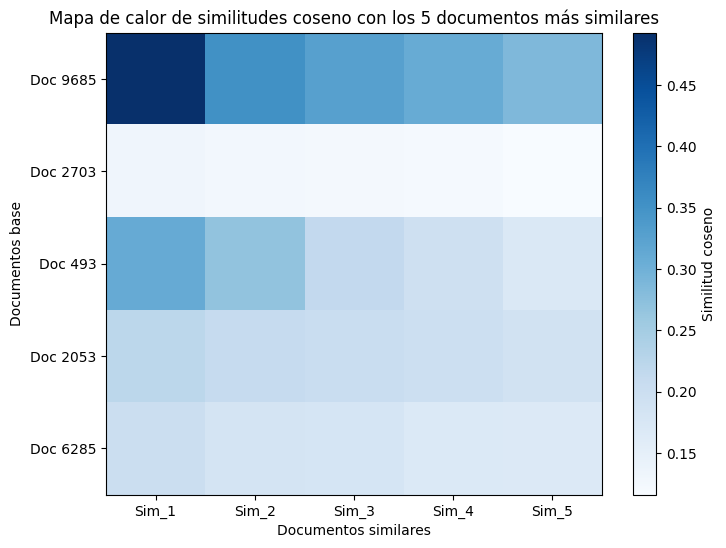

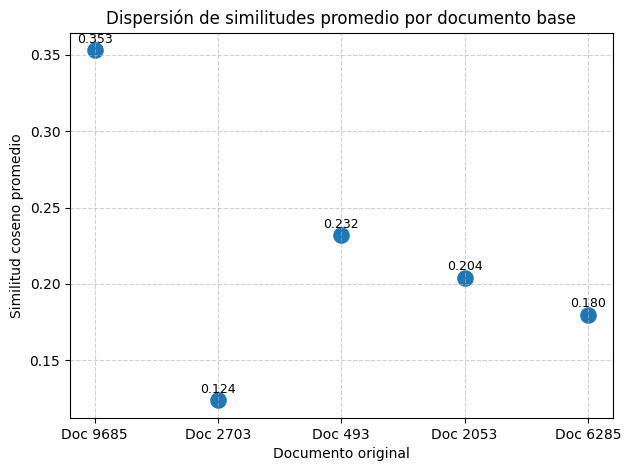

In [21]:
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar 5 índices de documentos al azar del conjunto de entrenamiento
#selected_indices = random.sample(range(len(newsgroups_train.data)), 5)

# Se eligen 5 documentos de la primera seleccion random
selected_indices = [9685, 2703, 493, 2053, 6285]
print("5 documentos seleccionados al azar:")
print(selected_indices)

print("\n================================5 documentos mas similares====================================================")

# Seleccionar los documentos
random_selected_documents = [newsgroups_train.data[i] for i in selected_indices]

# Vectorizar los documentos seleccionados al azar utilizando el TfidfVectorizer
X_random_selected = tfidfvect.transform(random_selected_documents)

# Calcular la similaridad coseno entre todos los documentos de entrenamiento
cossim_selected = cosine_similarity(X_random_selected, X_train)

# Matriz para el mapa de calor
similarity_matrix = []

for i, doc_idx in enumerate(selected_indices):
    print(f"\n--- Documentos más similares al Documento {doc_idx} ---")
    current_cossim = cossim_selected[i]

    most_similar_indices = np.argsort(current_cossim)[::-1][1:6]

    original_category = newsgroups_train.target_names[newsgroups_train.target[doc_idx]]
    print(f"Categoría del Documento Original: {original_category}")

    similar_docs_data = []

    for similar_doc_idx in most_similar_indices:
        similarity_score = current_cossim[similar_doc_idx]
        similar_doc_category = newsgroups_train.target_names[newsgroups_train.target[similar_doc_idx]]
        similar_docs_data.append({
            "Documento Similar (Índice)": similar_doc_idx,
            "Similaridad Coseno": similarity_score,
            "Categoría del Documento Similar": similar_doc_category
        })

    df_similar_docs = pd.DataFrame(similar_docs_data)
    display(df_similar_docs)

    # Guardar las similitudes para el mapa de calor
    similarity_matrix.append(df_similar_docs["Similaridad Coseno"].values)

print("\n\n ======================================== Gráficos=====================================\n\n")

# Convertir la lista de listas en DataFrame para el mapa de calor
sim_matrix_df = pd.DataFrame(similarity_matrix,
                             index=[f"Doc {i}" for i in selected_indices],
                             columns=[f"Sim_{j+1}" for j in range(5)])

# Mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(sim_matrix_df, cmap="Blues", aspect="auto")
plt.colorbar(label="Similitud coseno")
plt.xticks(range(sim_matrix_df.shape[1]), sim_matrix_df.columns)
plt.yticks(range(sim_matrix_df.shape[0]), sim_matrix_df.index)
plt.title("Mapa de calor de similitudes coseno con los 5 documentos más similares")
plt.xlabel("Documentos similares")
plt.ylabel("Documentos base")
plt.show()

# Promedio global de similitudes por documentos
avg_sim = sim_matrix_df.mean().mean()

# Gráfico de dispersión del promedio por documento
plt.figure(figsize=(7, 5))
plt.scatter(sim_matrix_df.index, sim_matrix_df.mean(axis=1), s=120)
plt.title("Dispersión de similitudes promedio por documento base")
plt.xlabel("Documento original")
plt.ylabel("Similitud coseno promedio")
plt.grid(True, linestyle="--", alpha=0.6)

for i, val in enumerate(sim_matrix_df.mean(axis=1)):
    plt.text(sim_matrix_df.index[i], val + 0.005, f"{val:.3f}", ha="center", fontsize=9)

plt.show()



### Concluaión 1

La vectorización TF-IDF y la similitud coseno demostraron ser herramientas efectivas para representar documentos como vectores numéricos y medir su proximidad semántica en función de la importancia de sus términos.

Los porcentajes de similitud obtenidos fueron relativamente bajos, siendo el valor más alto de aproximadamente 45 %, lo cual es esperable dada la diversidad temática del conjunto de datos.

Al observar el gráfico de promedios de similitud, considerando los cinco documentos más cercanos para cada caso, se evidencia que el modelo logra mayor mayor acierto en la misma categoría.

Por ejemplo:

Documento 9685 (talk.politics.mideast) presentó una alta coherencia temática, con valores de similitud de hasta 0.49, todos pertenecientes a la misma categoría.

Documento 2703 (comp.sys.ibm.pc.hardware) obtuvo similitudes mucho menores (≈ 0.12), lo que sugiere una menor coherencia temática. Siendo una clase de tecnología, solo un documento coincidió en su clase.

Otros documentos como 493, 2053 y 6285 mostraron niveles intermedios de similitud, coherentes con la heterogeneidad de sus contenidos.

En conjunto, los resultados confirman que la representación TF-IDF capta adecuadamente la estructura semántica global, permitiendo distinguir documentos con afinidad temática real, aunque la variabilidad del corpus limita los valores máximos de similitud.

### 2. Construir un modelo de clasificación por prototipos (tipo zero-shot)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd

# Define train y test
y_train = newsgroups_train.target
y_test = newsgroups_test.target

print("===================Clasificación zero-shot basada en similaridad============================")

# Calcular la similaridad coseno entre cada documento de test y todos los documentos de entrenamiento
# X_test: matriz vectorizada de documentos de test
# X_train: matriz vectorizada de documentos de entrenamiento
# El resultado será una matriz donde element (i, j) es la similaridad entre
# el i-ésimo documento de test y el j-th documento de entrenamiento.
# Esto puede tomar un tiempo considerable dependiendo del tamaño de los datasets.
similarity_matrix_test_train = cosine_similarity(X_test, X_train)

print(f"\n1)Matriz de similaridad entre test y train: {similarity_matrix_test_train.shape}")

# Para cada documento de test busca el documento de entrenamiento más similar
most_similar_train_indices = np.argmax(similarity_matrix_test_train, axis=1)

# Las etiquetas predichas para el conjunto de test serán las etiquetas de los documentos de entrenamiento más similares
y_pred_zero_shot = newsgroups_train.target[most_similar_train_indices]


# Mostrar Resultados

print("\n2) Resultados de la Clasificación Zero-Shot")

# Evaluar el desempeño utilizando F1-score macro
f1_macro_zero_shot = f1_score(y_test, y_pred_zero_shot, average='macro')
print(f"\t F1-score macro: {f1_macro_zero_shot:.4f}")

# Calcular Accuracy
accuracy_zero_shot = accuracy_score(y_test, y_pred_zero_shot)

# Mostrar una muestra de las predicciones en una tabla de pandas
print("\na) Etiquetas Predichas vs. Etiquetas Reales:")
sample_size = 10 # Número de muestras a mostrar

# Crear listas para la tabla
sample_test_indices = list(range(sample_size)) # Tomar los primeros 'sample_size' índices
sample_predicted_categories = [newsgroups_train.target_names[y_pred_zero_shot[i]] for i in sample_test_indices]
sample_actual_categories = [newsgroups_train.target_names[y_test[i]] for i in sample_test_indices]
prediction_matches = ["Sí" if y_pred_zero_shot[i] == y_test[i] else "No" for i in sample_test_indices]

# Crear el DataFrame
df_prediction_sample = pd.DataFrame({
    "Documento Test (Índice)": sample_test_indices,
    "Categoría Predicha": sample_predicted_categories,
    "Categoría Real": sample_actual_categories,
    "Coincide Predicción y Real": prediction_matches
})

# Mostrar el DataFrame
display(df_prediction_sample)

print(f"b) Porcentaje de acierto (Accuracy): {accuracy_zero_shot:.4f}")

===================Clasificación zero-shot basada en similaridad============================

1)Matriz de similaridad entre test y train: (7532, 11314)

2) Resultados de la Clasificación Zero-Shot
	 F1-score macro: 0.5050

a) Etiquetas Predichas vs. Etiquetas Reales:


,Documento Test (Índice),Categoría Predicha,Categoría Real,Coincide Predicción y Real
0,0,alt.atheism,rec.autos,No
1,1,talk.religion.misc,comp.windows.x,No
2,2,talk.politics.mideast,alt.atheism,No
3,3,talk.politics.mideast,talk.politics.mideast,Sí
4,4,alt.atheism,talk.religion.misc,No
5,5,sci.med,sci.med,Sí
6,6,talk.politics.guns,soc.religion.christian,No
7,7,misc.forsale,soc.religion.christian,No
8,8,comp.windows.x,comp.windows.x,Sí
9,9,comp.graphics,comp.graphics,Sí


b) Porcentaje de acierto (Accuracy): 0.5089


### Conclusión 2:

La técnica de clasificación Zero-Shot, aplicada mediante la similitud coseno entre vectores TF-IDF, permitió asignar etiquetas a los documentos del conjunto de prueba sin necesidad de entrenamiento supervisado.

La implementación de este clasificador “zero-shot” basado en similitud coseno arrojó resultados aceptables y consistentes, con un porcentaje de acierto (Accuracy) de 0.5089 y un F1-score macro de 0.5050. Estos valores evidencian un rendimiento moderado, pero satisfactorio si se considera que el método consume muchos menos recursos computacionales que un clasificador entrenado.


### 3. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación (f1-score macro) en el conjunto de datos de test.

===================Evaluando MultinomialNB con variacion del parámetros Alpha =======================
Experimentando con diferentes valores de alpha para MultinomialNB:

Resultados F1-score macro para diferentes valores de alpha:
Alpha = 0.0010, F1-score macro = 0.6713
Alpha = 0.0100, F1-score macro = 0.6829
Alpha = 0.1000, F1-score macro = 0.6565
Alpha = 0.2000, F1-score macro = 0.6425
Alpha = 0.3000, F1-score macro = 0.6322
Alpha = 0.4000, F1-score macro = 0.6224
Alpha = 0.5000, F1-score macro = 0.6153
Alpha = 0.6000, F1-score macro = 0.6077
Alpha = 0.7000, F1-score macro = 0.6011
Alpha = 0.8000, F1-score macro = 0.5950
Alpha = 0.9000, F1-score macro = 0.5903
Alpha = 1.0000, F1-score macro = 0.5854
Alpha = 2.0000, F1-score macro = 0.5400
Alpha = 5.0000, F1-score macro = 0.4689
Alpha = 10.0000, F1-score macro = 0.3986


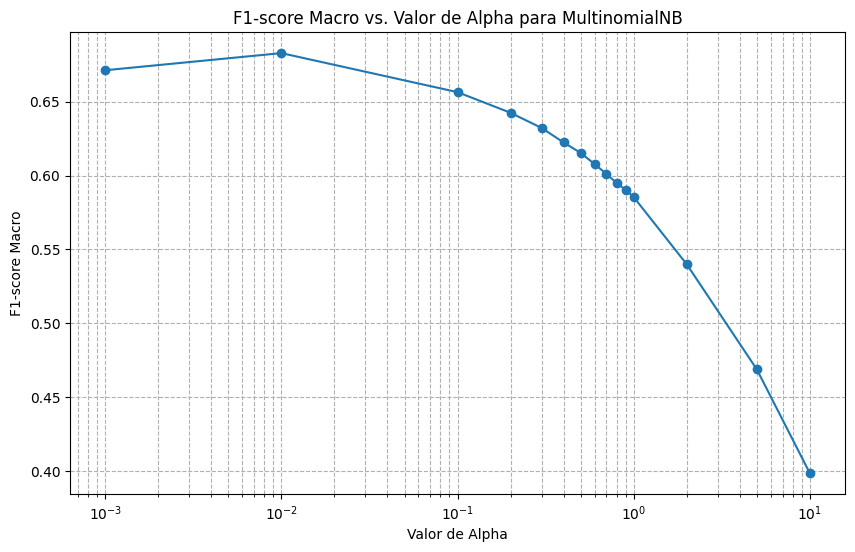

In [25]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

print("===================Evaluando MultinomialNB con variacion del parámetros Alpha =======================")

# Valores de alpha
alpha_values = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0]

# Listas para almacenar los resultados
f1_scores = []

print("Experimentando con diferentes valores de alpha para MultinomialNB:")

for alpha in alpha_values:
    mnb_clf = MultinomialNB(alpha=alpha)

    # Entrenar el modelo
    mnb_clf.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = mnb_clf.predict(X_test)

    # Calcular F1-score macro
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

# Mostrar los resultados
print("\nResultados F1-score macro para diferentes valores de alpha:")
for alpha, f1 in zip(alpha_values, f1_scores):
    print(f"Alpha = {alpha:.4f}, F1-score macro = {f1:.4f}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, f1_scores, marker='o')
plt.xscale('log')  # Escala logarítmica para el eje por la variación de alpha
plt.xlabel("Valor de Alpha")
plt.ylabel("F1-score Macro")
plt.title("F1-score Macro vs. Valor de Alpha para MultinomialNB")
plt.grid(True, which="both", ls="--")
plt.show()

Experimentando con diferentes valores de alpha para ComplementNB:

Resultados F1-score macro para diferentes valores de alpha (ComplementNB):
Alpha = 0.0010, F1-score macro = 0.6436
Alpha = 0.0100, F1-score macro = 0.6689
Alpha = 0.1000, F1-score macro = 0.6954
Alpha = 0.2000, F1-score macro = 0.6997
Alpha = 0.3000, F1-score macro = 0.6999
Alpha = 0.4000, F1-score macro = 0.6979
Alpha = 0.5000, F1-score macro = 0.6961
Alpha = 0.6000, F1-score macro = 0.6950
Alpha = 0.7000, F1-score macro = 0.6947
Alpha = 0.8000, F1-score macro = 0.6948
Alpha = 0.9000, F1-score macro = 0.6931
Alpha = 1.0000, F1-score macro = 0.6930
Alpha = 2.0000, F1-score macro = 0.6821
Alpha = 5.0000, F1-score macro = 0.6646
Alpha = 10.0000, F1-score macro = 0.6450


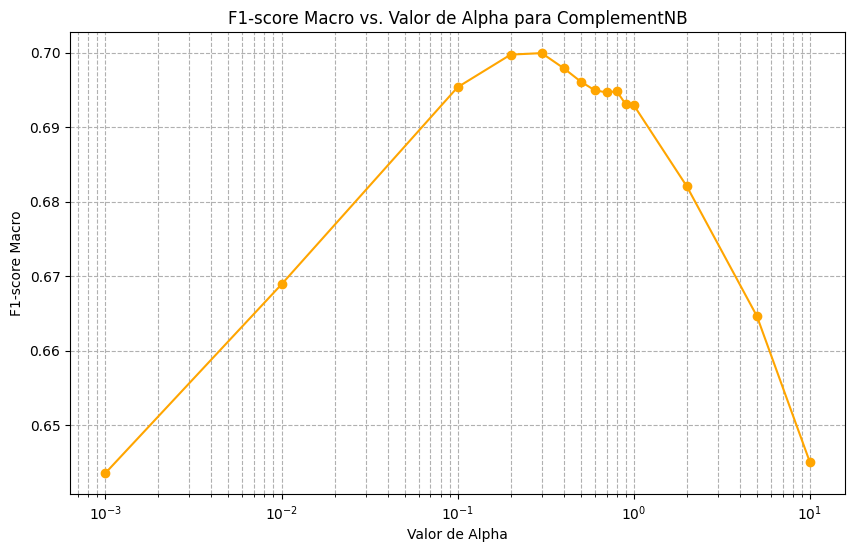

In [27]:
# Valores de alpha
alpha_values = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0]

# Listas para almacenar los resultados
f1_scores_cnb = []

print("===================Evaluando ComplementNB con variacion del parámetros Alpha =======================")

print("Experimentando con diferentes valores de alpha para ComplementNB:")

for alpha in alpha_values:
    cnb_clf = ComplementNB(alpha=alpha)

    # Entrenar el modelo
    cnb_clf.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_cnb = cnb_clf.predict(X_test)

    # Calcular F1-score macro
    f1_cnb = f1_score(y_test, y_pred_cnb, average='macro')
    f1_scores_cnb.append(f1_cnb)

# Mostrar los resultados
print("\nResultados F1-score macro para diferentes valores de alpha (ComplementNB):")
for alpha, f1_cnb in zip(alpha_values, f1_scores_cnb):
    print(f"Alpha = {alpha:.4f}, F1-score macro = {f1_cnb:.4f}")

# Opcional: Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, f1_scores_cnb, marker='o', color='orange')
plt.xscale('log') # Escala logarítmica para el eje por la variación de alpha
plt.xlabel("Valor de Alpha")
plt.ylabel("F1-score Macro")
plt.title("F1-score Macro vs. Valor de Alpha para ComplementNB")
plt.grid(True, which="both", ls="--")
plt.show()

### Conclusion 3

La elección del modelo Naïve Bayes (Multinomial o Complement) y la variación de su hiperparámetro `alpha(α)` sirvió para ver sus rendimiento.

Para el MultinomialNB el mejor rendimiento se obtuvo con α = 0.01, alcanzando un F1-score=0.6829. Valores de `α` < 0.001 o `α` > 0.1 provocaron ligeras caídas. En el caso del ComplementNB, el rendimiento general fue superior, con un máximo F1-score = 0.6999 para α ≈ 0.3–0.4. Demostrando mayor robustez.
El ComplementNB se consolida como la mejor opción para este corpus, al manejar mejor la variabilidad léxica y el desbalance entre clases.

### 4. Transponer la matriz documento-término. De esa manera se obtiene una matriz término-documento que puede ser interpretada como una colección de vectorización de palabras.


In [40]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import math

print("Transponiendo la matriz documento-término...")
# Transponer la matriz X_train (documento-término) para obtener la matriz término-documento
# La matriz esparsa X_train es de forma (n_documentos, n_terminos).
# Al transponerla, obtenemos una matriz de forma (n_terminos, n_documentos).
X_train_transposed = X_train.T

print(f"Matriz término-documento:(n_terminos, n_documentos) {X_train_transposed.shape}")

# Calculamos la similaridad coseno entre estas filas para obtener la similaridad entre palabras.

# Crear el mapeo de índice a palabra
idx2word = {idx: word for word, idx in tfidfvect.vocabulary_.items()}
print(f"Tamaño del vocabulario: {len(idx2word)}")

# Mostrar el vocabulario en varias columnas
words = list(idx2word.values())
n_columns = 5
n_rows = math.ceil(len(words) / n_columns)

# Mostrar lista de palabras
display_words_grid = []
for r in range(n_rows):
    row_words = []
    for c in range(n_columns):
        idx = r + c * n_rows
        if idx < len(words):
            row_words.append(words[idx])
        else:
            row_words.append('')
    display_words_grid.append(row_words)

print("Vocabulario del dataset:")
df_vocab = pd.DataFrame(display_words_grid)
display(df_vocab)


# Seleccionar algunas palabras manualmente para analizar su similaridad
words_to_analyze = ["windows", "car", "god", "electronics", "baseball"]

# Obtener los índices de estas palabras en el vocabulario
word_indices_to_analyze = [tfidfvect.vocabulary_.get(word) for word in words_to_analyze if word in tfidfvect.vocabulary_]

# Eliminar None en caso de que alguna palabra no esté en el vocabulario
word_indices_to_analyze = [idx for idx in word_indices_to_analyze if idx is not None]

# Lista para almacenar todos los datos de palabras similares para un solo DataFrame
all_similar_words_data = []

print(f"\n\n Analizando similaridad para las palabras: {[idx2word[i] for i in word_indices_to_analyze]}")

for i, word_idx in enumerate(word_indices_to_analyze):
    word = idx2word[word_idx]

    current_word_vector = X_train_transposed[word_idx]
    cossim_word = cosine_similarity(current_word_vector, X_train_transposed)[0]
    most_similar_word_indices = np.argsort(cossim_word)[::-1][1:6]

    for similar_word_idx in most_similar_word_indices:
        similarity_score = cossim_word[similar_word_idx]
        similar_word = idx2word[similar_word_idx]
        all_similar_words_data.append({
            "Palabra Original": word,
            "Palabra Similar": similar_word,
            "Índice de Palabra Similar": similar_word_idx,
            "Similaridad Coseno": similarity_score
        })

# Mostrar datos
df_all_similar_words = pd.DataFrame(all_similar_words_data)
display(df_all_similar_words)



Transponiendo la matriz documento-término...
Matriz término-documento:(n_terminos, n_documentos) (101631, 11314)
Tamaño del vocabulario: 101631
Vocabulario del dataset:


,0,1,2,3,4
0,was,imprisoned,1899,xrules,vangelis
1,wondering,economics,a3000,xrule,arabatzis
2,if,schafer,probabably,xfix,vasilis
3,anyone,randolph,a2000,xtitle,papadopoulos
4,out,higgins,tzeng,xentry,kiriazis
...,...,...,...,...,...
20322,afflicted,3000ux,25375,dimitris,willow
20323,quarrels,esc,33961,voglis,
20324,avoiding,a4000,6257,falanga,
20325,forgiving,ec030,x10th,soles,


Analizando similaridad para las palabras: ['windows', 'car', 'god', 'electronics', 'baseball']


,Palabra Original,Palabra Similar,Índice de Palabra Similar,Similaridad Coseno
0,windows,dos,34844,0.303705
1,windows,ms,63693,0.232047
2,windows,microsoft,61614,0.221937
3,windows,nt,66781,0.214015
4,windows,for,41127,0.192976
5,car,cars,25921,0.179666
6,car,criterium,30533,0.177040
7,car,civic,27562,0.174773
8,car,owner,69218,0.168906
9,car,dealer,32150,0.168111


### Conclusión 4

Se transpuso la matriz documento-término para obtener una matriz término-documento, permitiendo explorar la similaridad coseno entre palabras

Las similitudes coseno más altas ≈ 0.30–0.33 se concentran en términos técnicos o específicos: `windows–dos, electronics–taft`, mientras que palabras generales presentan valores más bajos ≈ 0.17–0.26.

`Windows`: Presenta alta similitud con dos, ms, microsoft y nt, lo que refleja correctamente su contexto tecnológico y su asociación con productos de software.

`Car`: Se asocia con cars, civic, owner y dealer, palabras del mismo campo semántico, lo que demuestra coherencia contextual en temas de automóviles.

`God`: Se vincula con jesus, bible, existence y christ, agrupando correctamente conceptos religiosos y teológicos.

`Electronics`: Produce resultados menos interpretables (taft, fordham), sugiere ruido semántico, probablemente debido a baja frecuencia o ambigüedad contextual.

`Baseball`: Se relaciona con football, espn y tommorrow, reflejando un campo deportivo, aunque con similitudes de menor magnitud.

Esto sugiere que el modelo captura asociaciones léxicas relevantes, pero la naturaleza dispersa del corpus 20 Newsgroups y la representación TF-IDF, que ignora el orden y el contexto sintáctico, limita la capacidad para captar relaciones más profundas.
